In [3]:
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from rembg import remove
import cv2
from PIL import Image
from skimage.feature import hog

import os
import io

## Create DataFrame

In [7]:
print(os.getcwd())
current = os.getcwd()
data_folder = current + "/data"

/Users/khanhchile/Downloads/School/CSCI 5525/5525Chess


In [9]:
chess_types_folders = glob.glob(data_folder + "/*")
# print(chess_types_folders)
pieces_info = []
for chess_types in chess_types_folders:
    pieces = glob.glob(f'{chess_types}/*')
    # print(pieces)
    type = chess_types.split("/")[-1]
    for piece in pieces:
        p = {"image_path": piece, "label": type}
        pieces_info.append(p)
chess_df = pd.DataFrame(pieces_info)

## EDA

In [36]:

chess_df.head()

,image_path,label
0,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Bishop
1,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Bishop
2,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Bishop
3,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Bishop
4,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Bishop


In [40]:
print(chess_df.shape) #856 samples, 2 attributes (image path, label)

(856, 2)


In [38]:
chess_df.describe()

,image_path,label
count,856,856
unique,856,6
top,/Users/khanhchile/Downloads/School/CSCI 5525/5...,Pawn
freq,1,157


In [42]:
label_counts = chess_df['label'].value_counts()
print(label_counts)

label
Pawn      157
Knight    156
Rook      152
Bishop    137
Queen     128
King      126
Name: count, dtype: int64


## Visualize data

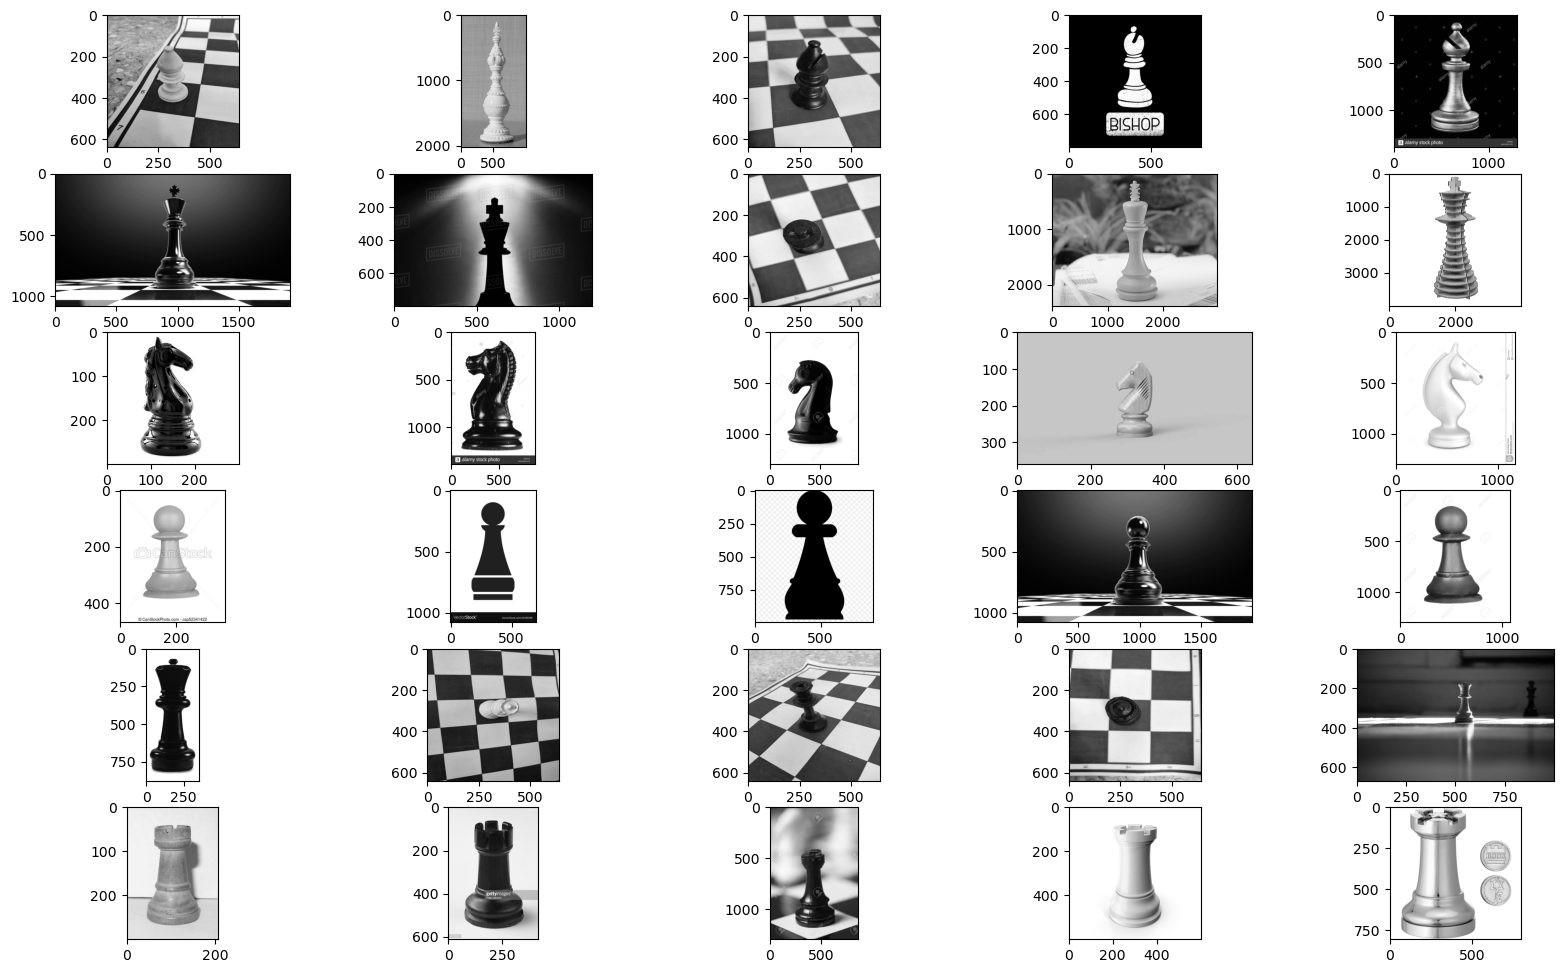

In [44]:
labels = sorted(chess_df['label'].unique())
fig, ax = plt.subplots(len(labels), 5, figsize=(20, 12))
for row, label in enumerate(labels):
    for col, im_pth in enumerate(chess_df[chess_df['label'] == label]['image_path'].sample(n=5, random_state=0).values):
        ax[row][col].imshow(np.array(Image.open(im_pth).convert('L')), cmap='gray')

## Preprocessing Image Data

In [52]:
labels = ['King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [54]:
# #remove background
# output_dir = "removebg"
# os.makedirs(output_dir, exist_ok=True)
# labels = sorted(chess_df['label'].unique())
for label in labels:
    label_dir = os.path.join(output_dir, str(label))  # Create a subdirectory for each label
    os.makedirs(label_dir, exist_ok=True)
    i = 0
    # Process each image for the current label
    for im_pth in chess_df[chess_df['label'] == label]['image_path']:
        print(f"processing img num: {i}")
        # Open the image
        with open(im_pth, 'rb') as input_file:
            # Remove background
            output = remove(input_file.read())

        # Convert raw bytes to a PIL Image
        image = Image.open(io.BytesIO(output)).convert("RGB")

        # Convert PIL Image to OpenCV format
        image_array = np.array(image)
        image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

        # Save the processed image
        save_path = os.path.join(label_dir, f'foreground_{os.path.basename(im_pth)}.jpg')
        cv2.imwrite(save_path, image_bgr)
        i += 1


processing img num: 0
processing img num: 1
processing img num: 2
processing img num: 3
processing img num: 4
processing img num: 5
processing img num: 6
processing img num: 7
processing img num: 8
processing img num: 9
processing img num: 10
processing img num: 11
processing img num: 12
processing img num: 13
processing img num: 14
processing img num: 15
processing img num: 16
processing img num: 17
processing img num: 18
processing img num: 19
processing img num: 20
processing img num: 21
processing img num: 22
processing img num: 23
processing img num: 24
processing img num: 25
processing img num: 26
processing img num: 27
processing img num: 28
processing img num: 29
processing img num: 30
processing img num: 31
processing img num: 32
processing img num: 33
processing img num: 34
processing img num: 35
processing img num: 36
processing img num: 37
processing img num: 38
processing img num: 39
processing img num: 40
processing img num: 41
processing img num: 42
processing img num: 4

In [13]:
# Directory to save preprocessed images
output_dir = "normalized_images"
os.makedirs(output_dir, exist_ok=True)

# Normalize and save images
labels = sorted(chess_df['label'].unique())
for label in labels:
    label_dir = os.path.join(output_dir, str(label))  # Create a subdirectory for each label
    os.makedirs(label_dir, exist_ok=True)
    
    for im_pth in chess_df[chess_df['label'] == label]['image_path']:
        # Open and preprocess the image
        image = Image.open(im_pth).convert('L').resize((224, 224))
        image_array = np.array(image) / 255.0  # Normalize to [0, 1]
        print(image_array)
        
        # Optionally save as NumPy arrays
        np.save(os.path.join(label_dir, f"normalized_{os.path.basename(im_pth)}.npy"), image_array)



[[0.83921569 0.85098039 0.84705882 ... 0.6        0.60784314 0.61568627]
 [0.82745098 0.82745098 0.83137255 ... 0.61960784 0.61176471 0.61568627]
 [0.70588235 0.70588235 0.70980392 ... 0.62745098 0.61960784 0.62745098]
 ...
 [0.29411765 0.29803922 0.29803922 ... 0.40392157 0.39215686 0.39607843]
 [0.29019608 0.28235294 0.27843137 ... 0.38431373 0.39215686 0.39607843]
 [0.30196078 0.29411765 0.30588235 ... 0.39215686 0.38039216 0.38823529]]
[[0.98431373 0.99607843 1.         ... 1.         0.99607843 0.98039216]
 [0.97647059 0.98039216 1.         ... 0.99607843 0.98039216 0.97647059]
 [1.         0.98039216 0.97647059 ... 0.97647059 0.98039216 1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[0.18823529 0.18431373 0.17647059 ... 0.81568627 0.82352941 0.82745098]
 [0.17647059 0.17647059 0.17647059 ... 